In [267]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [268]:
# initialize two dict for storing data for myo-1 and myo-2
def init_data():
    data1 = dict()
    data1['ori'] = {'time':[], 'ori': []}
    data1['acc'] = {'time':[], 'acc': []}
    data1['gyr'] = {'time':[], 'gyr': []}

    data2 = dict()
    data2['ori'] = {'time':[], 'ori': []}
    data2['acc'] = {'time':[], 'acc': []}
    data2['gyr'] = {'time':[], 'gyr': []}
    
    return data1, data2

In [269]:
def read_file(filepath, data1, data2):
    with open(filepath) as fp:
        for cnt, line in enumerate(fp):
            info = line.strip().split('|')
            connection = int(info[1].strip()[-1])
            data_type = info[0].strip()
            time = float(info[2].split(':')[-1])
            x = float(info[3].split(':')[-1])
            y = float(info[4].split(':')[-1])
            z = float(info[5].split(':')[-1])
            if connection == 0:
                data1[data_type]['time'].append(time)
                data1[data_type][data_type].append([x, y, z])
            elif connection == 1:
                data2[data_type]['time'].append(time)
                data2[data_type][data_type].append([x, y, z])

In [270]:
def plot_data(time_stamp, data, label, xrange, axis='xyz', xlabels=10):
    start = time_stamp[0]
    end = time_stamp[-1]
    time_interval = (end-start)/xlabels
    x_ticks = [(start + i*time_interval) for i in range(xlabels+1)]

    fig = plt.figure(figsize=(16,6))
    if 'x' in axis:
        plt.plot(time_stamp, data[:,0], 'red')
    if 'y' in axis:
        plt.plot(time_stamp, data[:,1], 'blue')
    if 'z' in axis:
        plt.plot(time_stamp, data[:,2], 'green')

#     plt.xticks(x_ticks)
    if xrange == None:
        xrange = [time_stamp[0]-0.5, time_stamp[-1]+0.5]
    plt.xlim(xrange)
    legend_list = []
    for ax in axis:
        legend_list.append(label+'_'+ax)
    plt.legend(legend_list)
    plt.show()

### Test Walk1
logo on the right

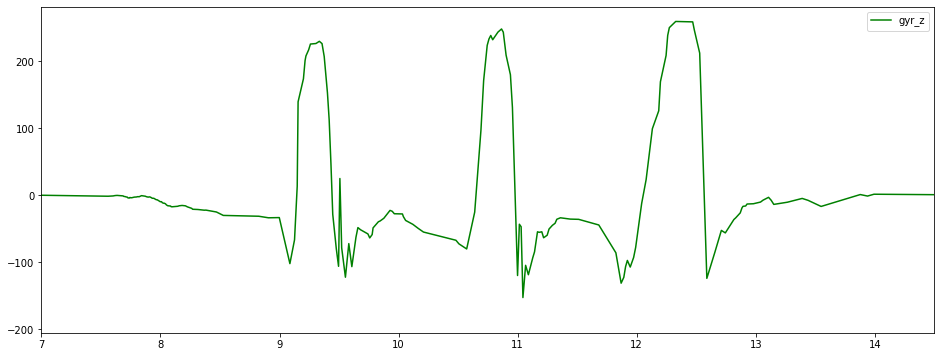

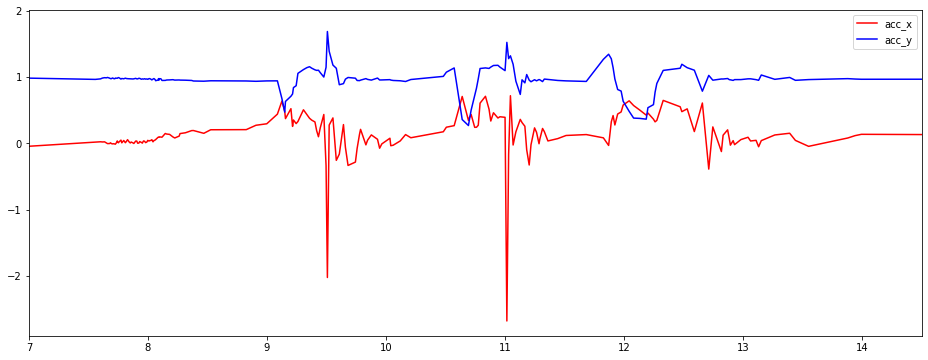

In [274]:
filepath = 'walk1-output-2021-05-03-20-23-32.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

# data1 right leg, 3 steps
plot_data(gyr_time_1, -gyr_1, 'gyr', [7, 14.5], 'z')
plot_data(acc_time_1, acc_1, 'acc', [7, 14.5], 'xy')

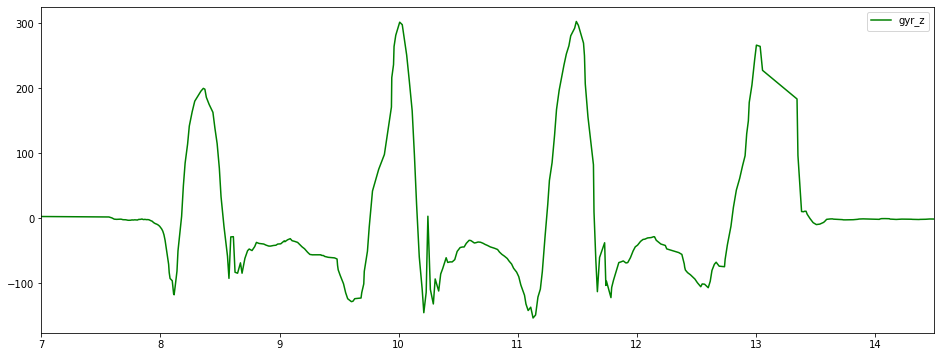

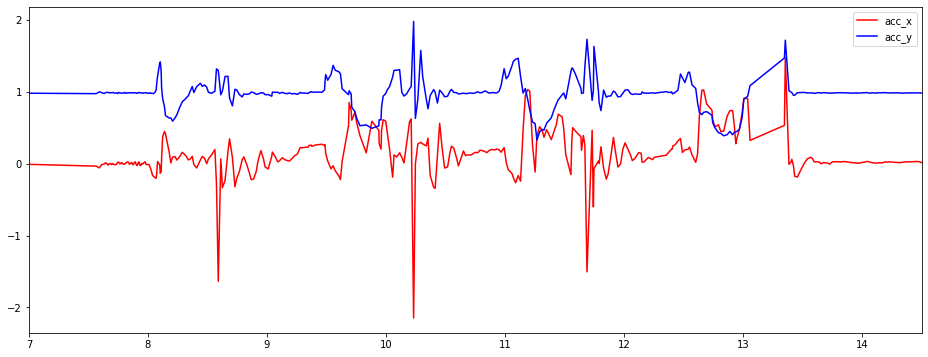

In [275]:
# data2 left leg, 4 steps
plot_data(gyr_time_2, -gyr_2, 'gyr', [7, 14.5], 'z')
plot_data(acc_time_2, acc_2, 'acc', [7, 14.5], 'xy')

### haven't figured out what exact angles the orientation represent

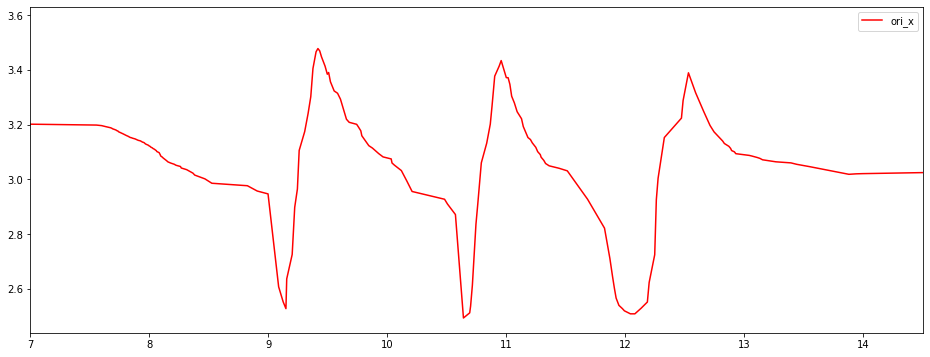

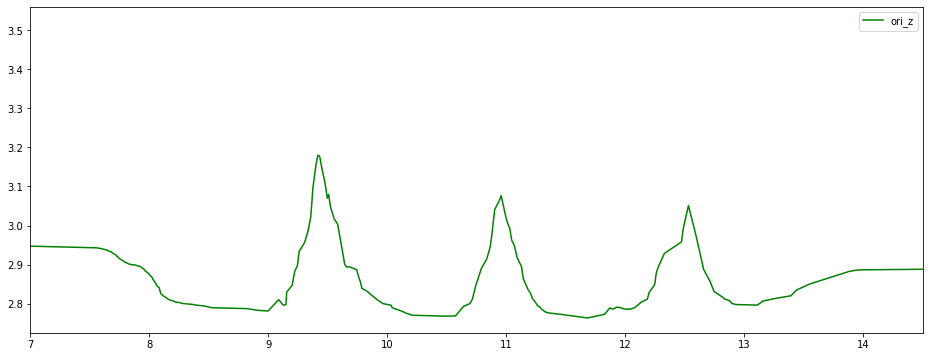

In [280]:
# ori_1[:,0] = [x if x > 0 else x+2*math.pi for x in ori_1[:,0]]
# ori_1[:,2] = [x if x > 0 else x+2*math.pi for x in ori_1[:,2]]
plot_data(ori_time_1, ori_1, 'ori', [7, 14.5], 'x')
plot_data(ori_time_1, ori_1, 'ori', [7, 14.5], 'z')

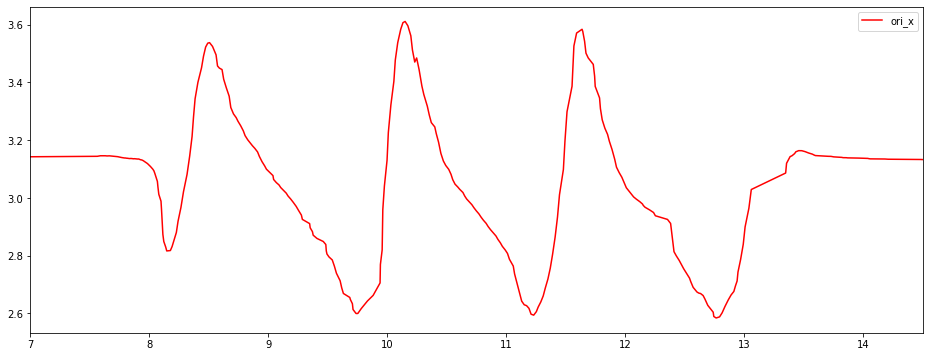

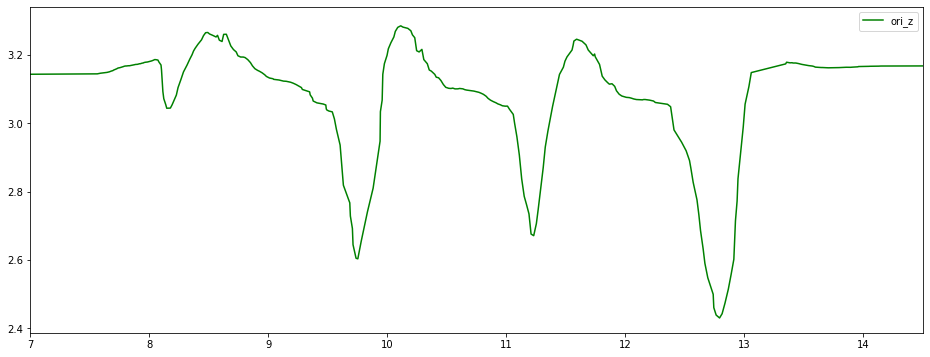

In [281]:
# ori_2[:,0] = [x if x > 0 else x+2*math.pi for x in ori_2[:,0]]
# ori_2[:,2] = [x if x > 0 else x+2*math.pi for x in ori_2[:,2]]
plot_data(ori_time_2, ori_2, 'ori', [7, 14.5], 'x')
plot_data(ori_time_2, ori_2, 'ori', [7, 14.5], 'z')

### Test-Walk2
logo on the front

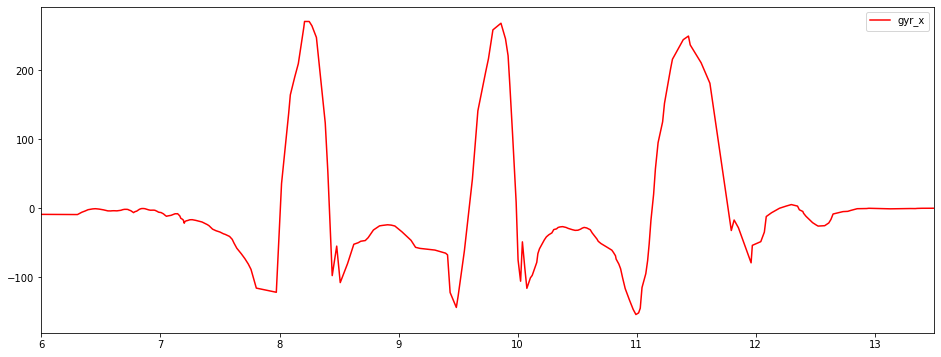

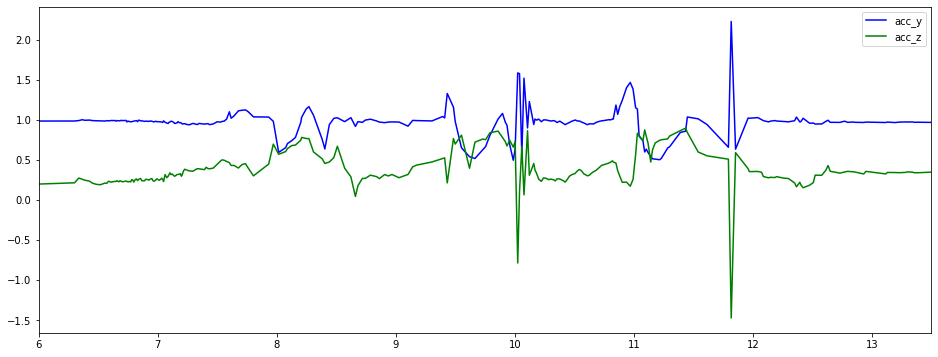

In [296]:
filepath = 'walk2-output-2021-05-03-20-25-58.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

# data1, right leg, 3 steps
plot_data(gyr_time_1, gyr_1, 'gyr', [6, 13.5], 'x')
plot_data(acc_time_1, acc_1, 'acc', [6, 13.5], 'yz')

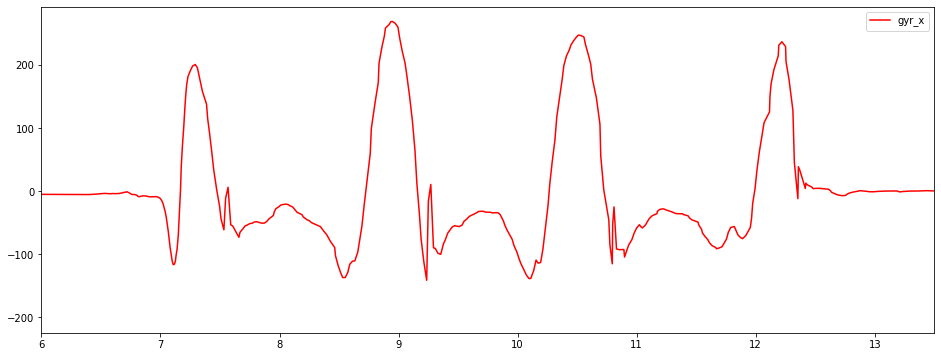

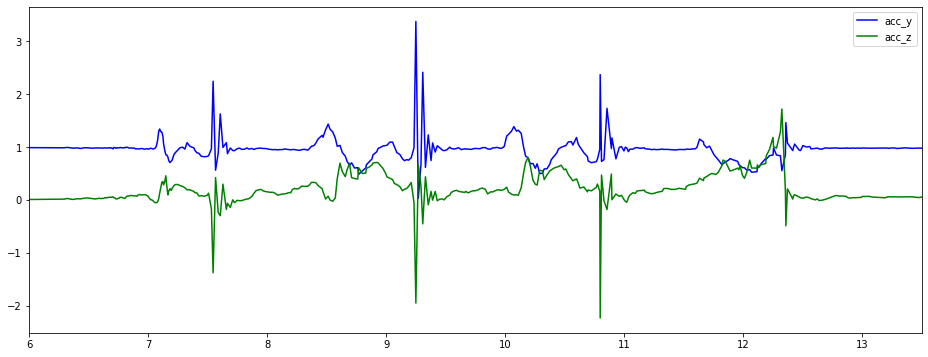

In [297]:
# data2, left leg, 4 steps
plot_data(gyr_time_2, gyr_2, 'gyr', [6, 13.5], 'x')
plot_data(acc_time_2, acc_2, 'acc', [6, 13.5], 'yz')

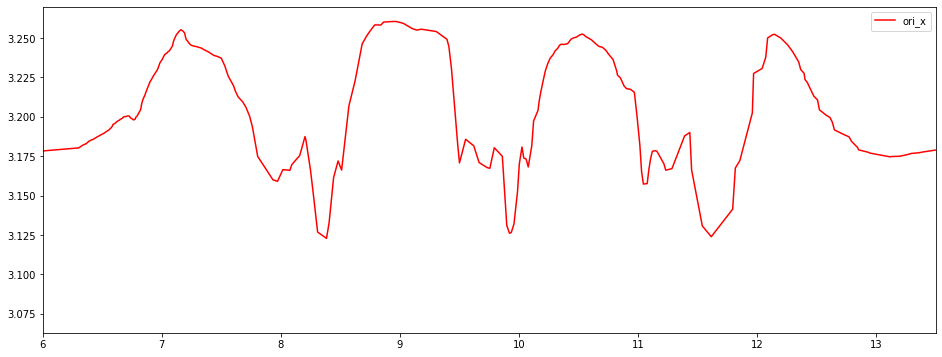

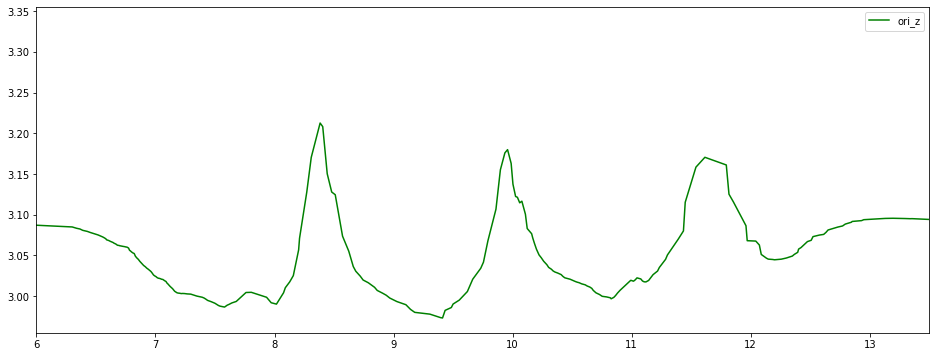

In [298]:
# left leg orientation
# ori_1[:,0] = [x if x > 0 else x+2*math.pi for x in ori_1[:,0]]
# ori_1[:,2] = [x if x > 0 else x+2*math.pi for x in ori_1[:,2]]
plot_data(ori_time_1, ori_1, 'ori', [6, 13.5], 'x')
plot_data(ori_time_1, ori_1, 'ori', [6, 13.5], 'z')

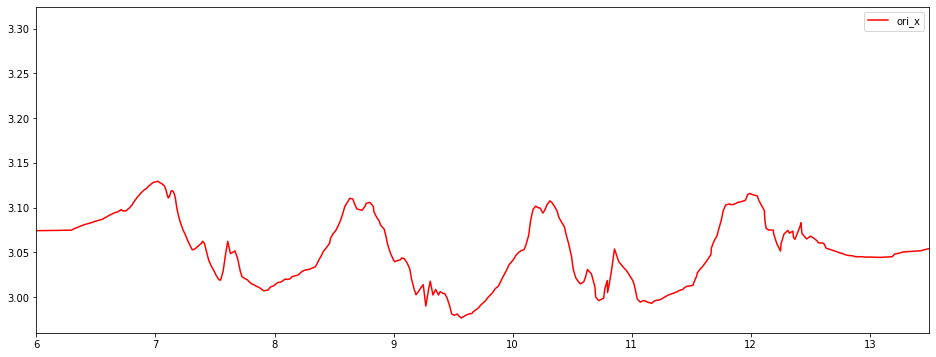

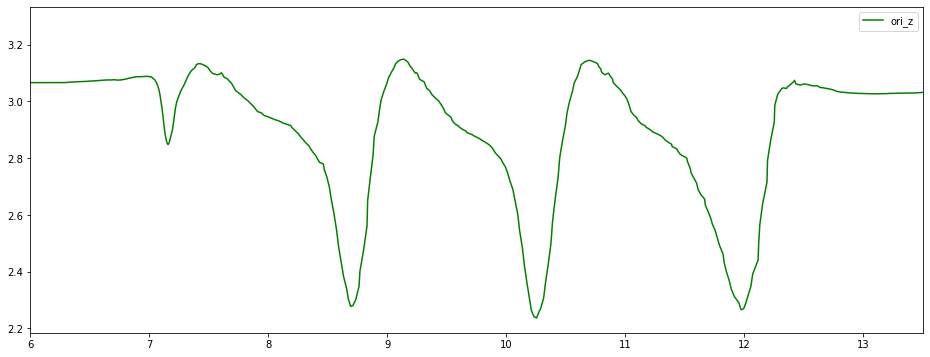

In [299]:
# right leg orientation
# ori_2[:,0] = [x if x > 0 else x+2*math.pi for x in ori_2[:,0]]
# ori_2[:,2] = [x if x > 0 else x+2*math.pi for x in ori_2[:,2]]
plot_data(ori_time_2, ori_2, 'ori', [6, 13.5], 'x')
plot_data(ori_time_2, ori_2, 'ori', [6, 13.5], 'z')

### ------------------Preliminaryrandom tests to figure out axis and orientation--------------------

In [116]:
filepath = 'test-rotation-output-2021-05-02-19-02-16.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

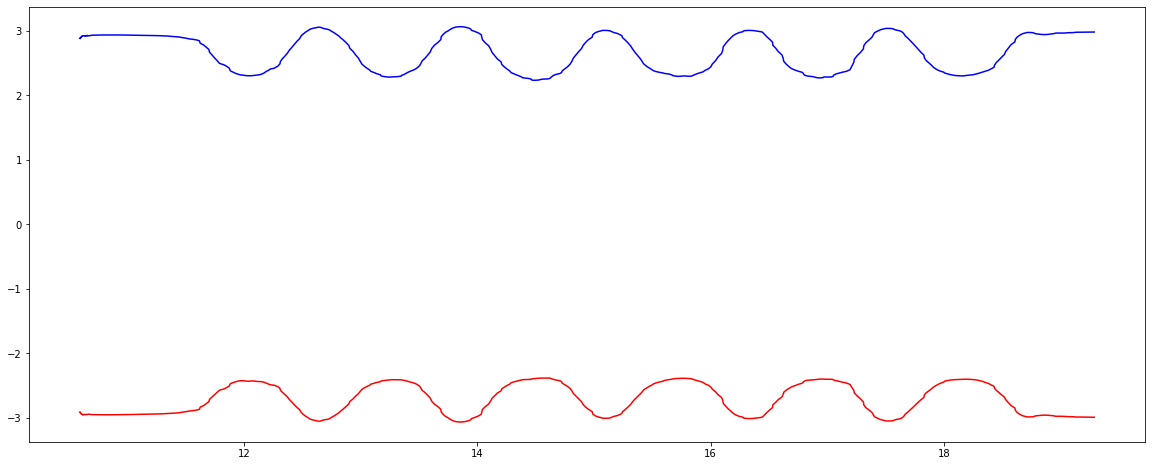

In [117]:
plt.figure(figsize=(20,8))
plt.plot(ori_time_1, ori_1[:,0],'r')
plt.plot(ori_time_1, ori_1[:,2],'b')
# plt.plot(ori_time_2, ori_2[:,0],'b')
plt.show()

In [154]:
filepath = 'test-ori1-output-2021-05-02-19-25-03.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

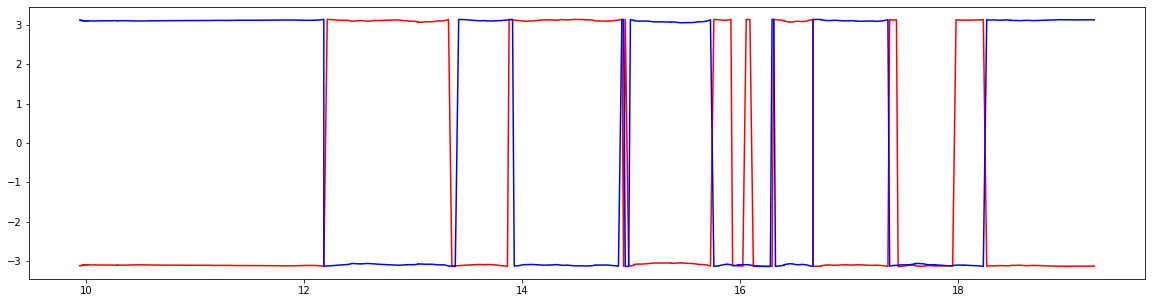

In [155]:
plt.figure(figsize=(20,5))
plt.plot(ori_time_1, ori_1[:,0],'r')
plt.plot(ori_time_1, ori_1[:,2],'b')
plt.show()

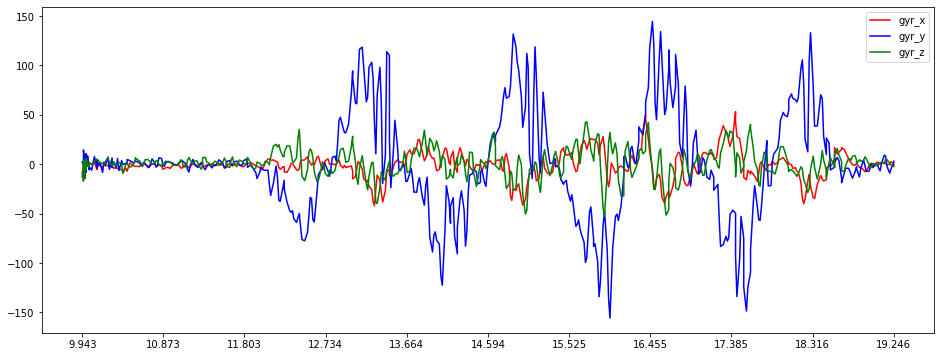

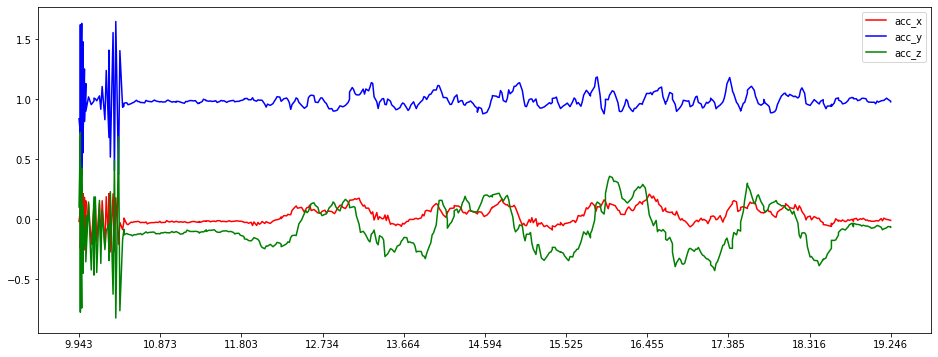

In [157]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

In [158]:
filepath = 'test-ori2-output-2021-05-02-19-33-12.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

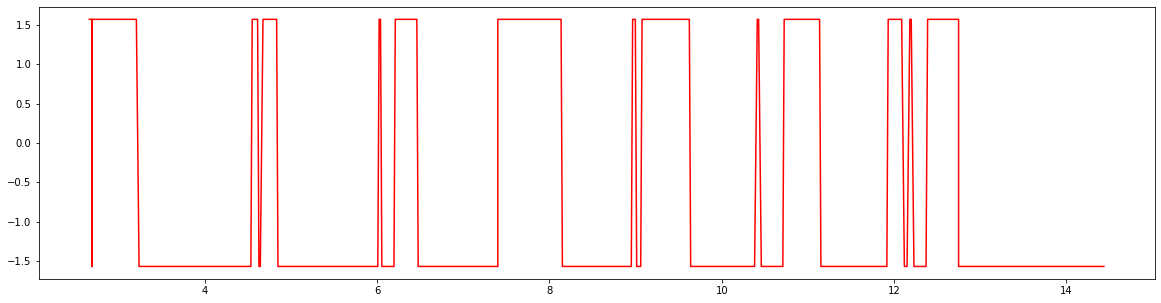

In [159]:
plt.figure(figsize=(20,5))
plt.plot(ori_time_1, ori_1[:,1],'r')
# plt.plot(ori_time_1, ori_1[:,2],'b')
plt.show()

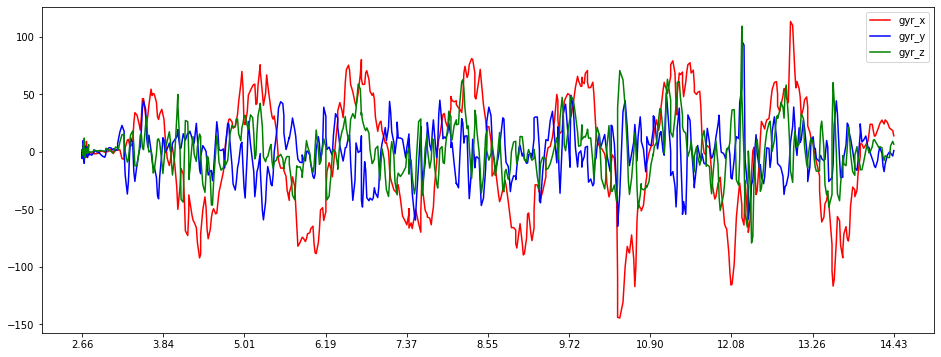

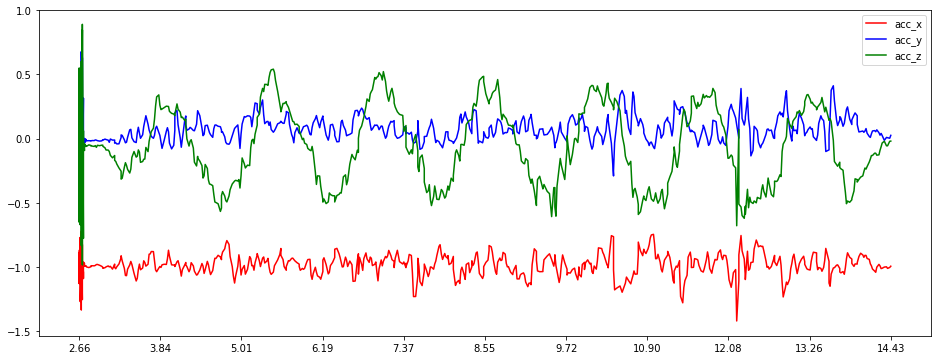

In [160]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

In [140]:
filepath = 'test-ori3-output-2021-05-02-19-46-12.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

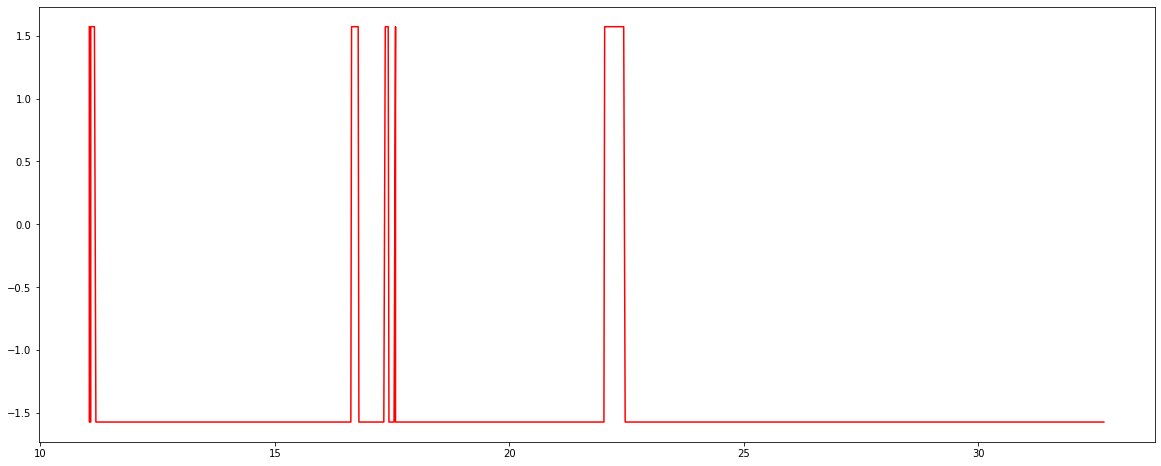

In [145]:
plt.figure(figsize=(20,8))
plt.plot(ori_time_1, ori_1[:,1],'r')
# plt.plot(ori_time_1, ori_1[:,2],'b')
plt.show()

In [146]:
filepath = 'test-ori4-output-2021-05-02-19-52-11.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

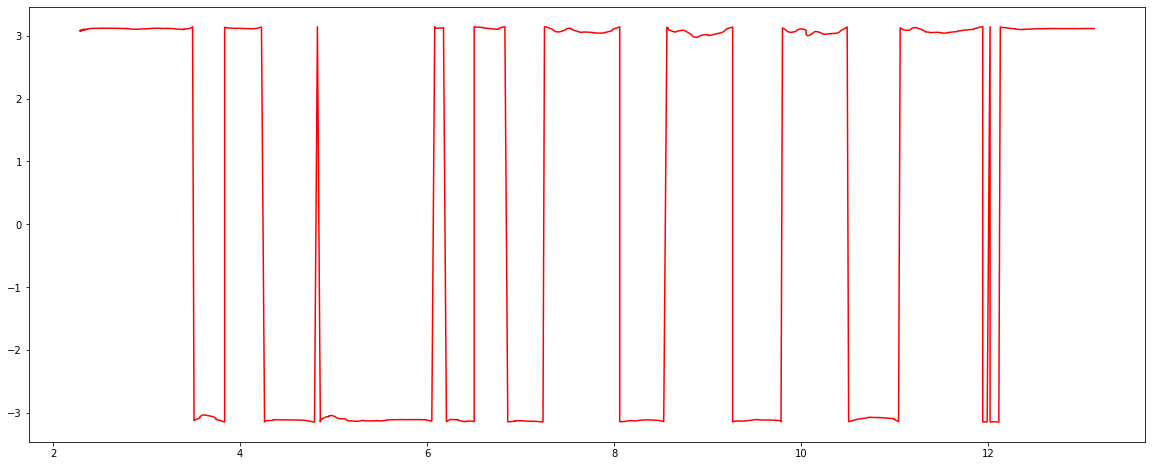

In [153]:
plt.figure(figsize=(20,8))
plt.plot(ori_time_1, ori_1[:,2],'r')
plt.show()

In [167]:
filepath = 'test5-output-2021-05-02-22-15-55.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

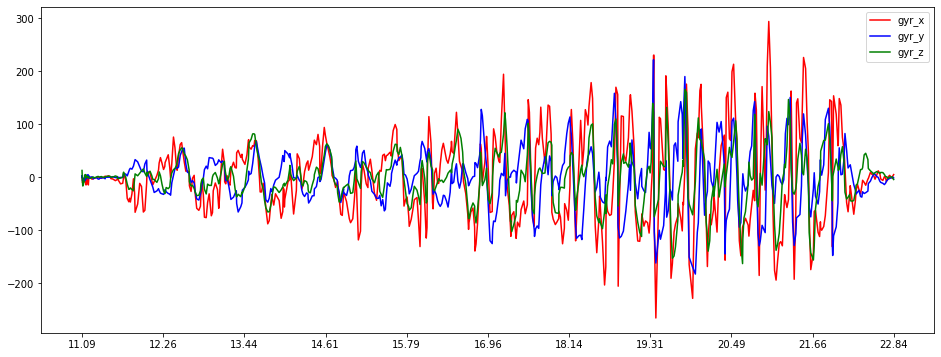

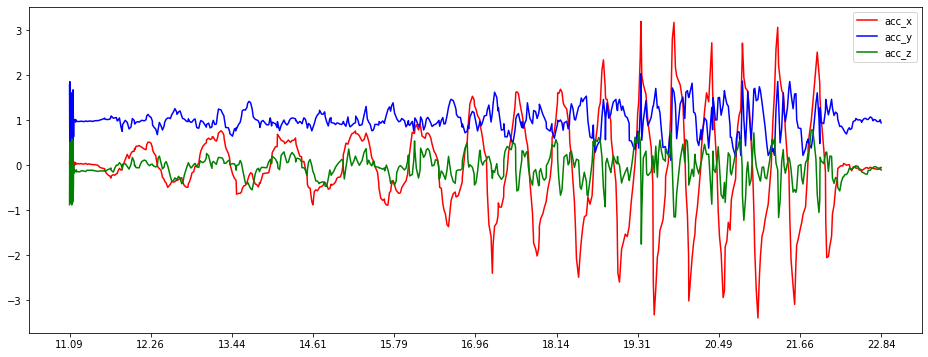

In [168]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

In [169]:
filepath = 'test6-output-2021-05-02-22-26-37.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

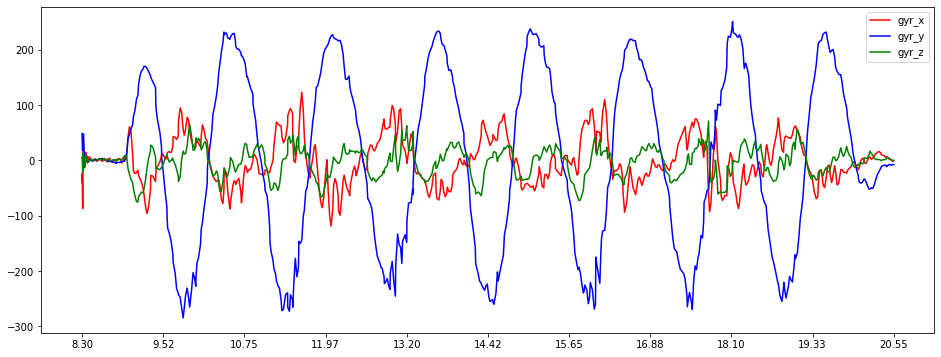

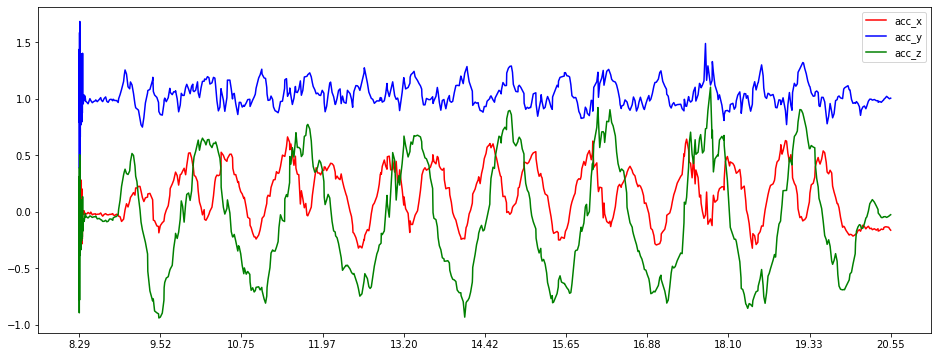

In [170]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

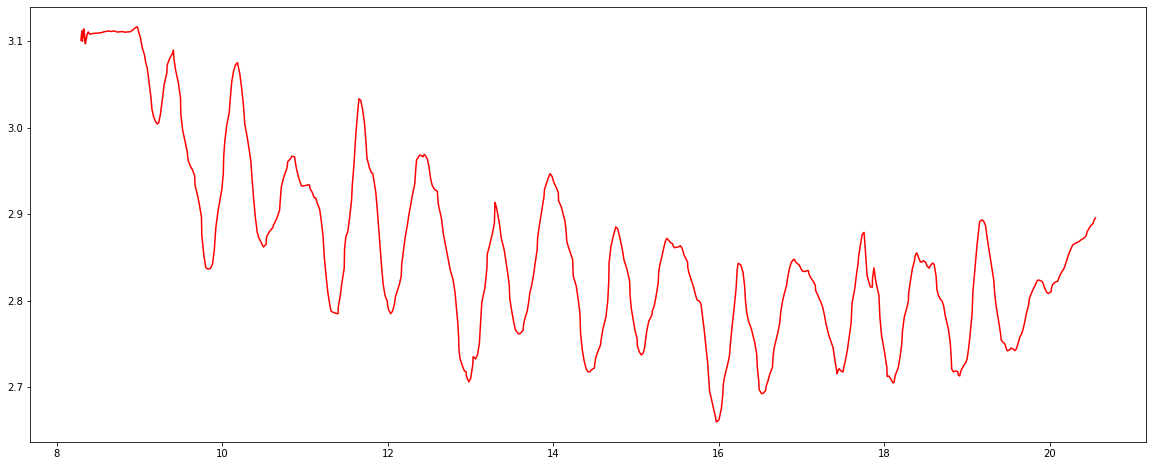

In [174]:
plt.figure(figsize=(20,8))
plt.plot(ori_time_1, ori_1[:,2],'r')
plt.show()

In [175]:
filepath = 'test7-output-2021-05-02-22-36-18.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

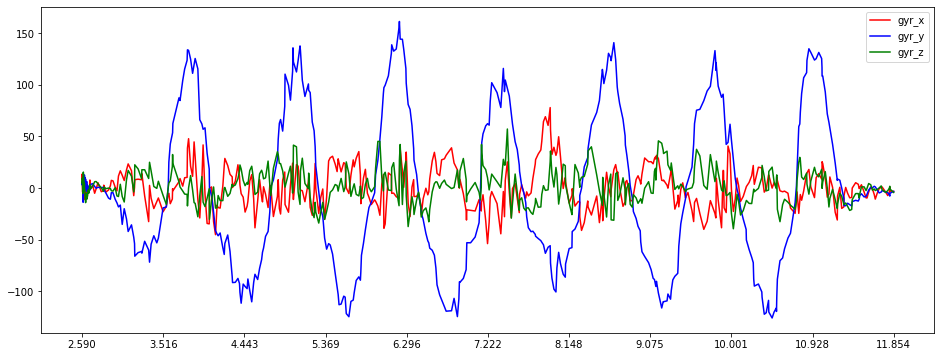

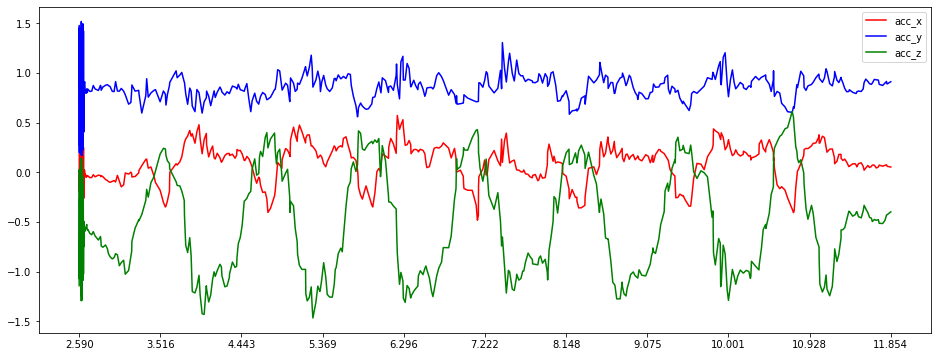

In [181]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

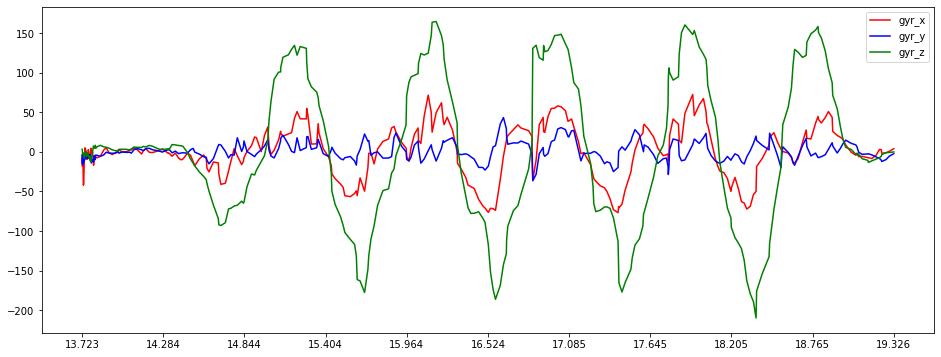

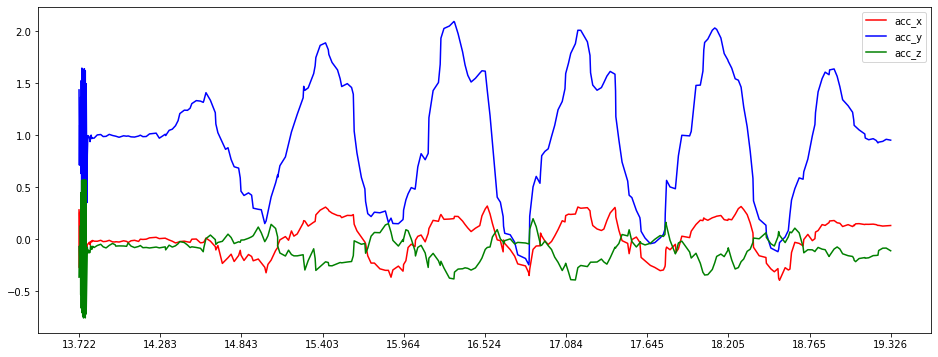

In [182]:
filepath = 'test8-output-2021-05-02-22-40-50.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

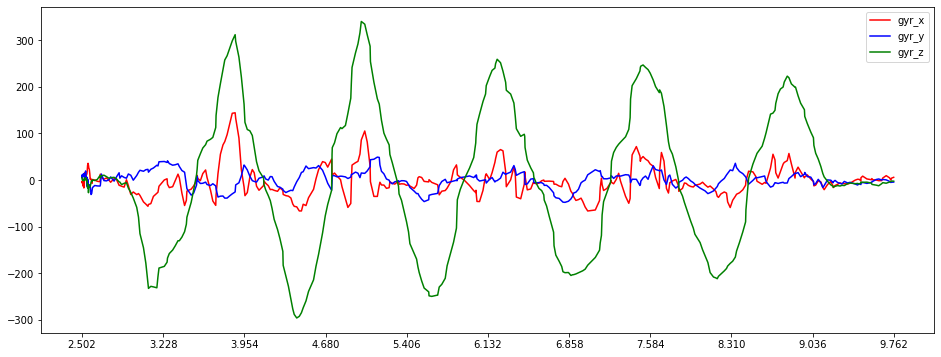

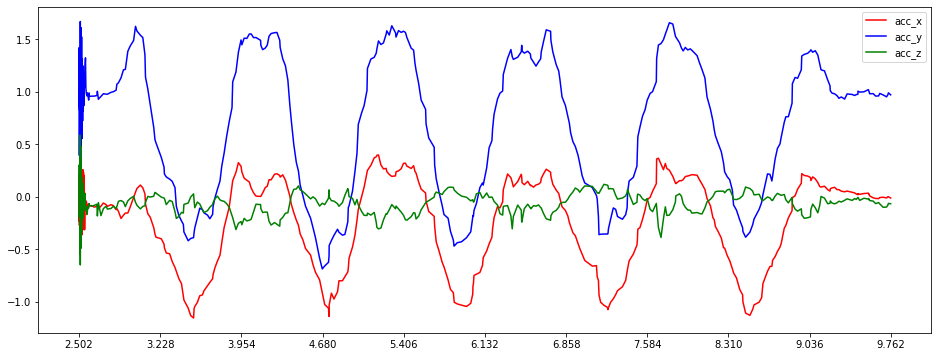

In [185]:
filepath = 'test9-output-2021-05-02-23-19-22.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

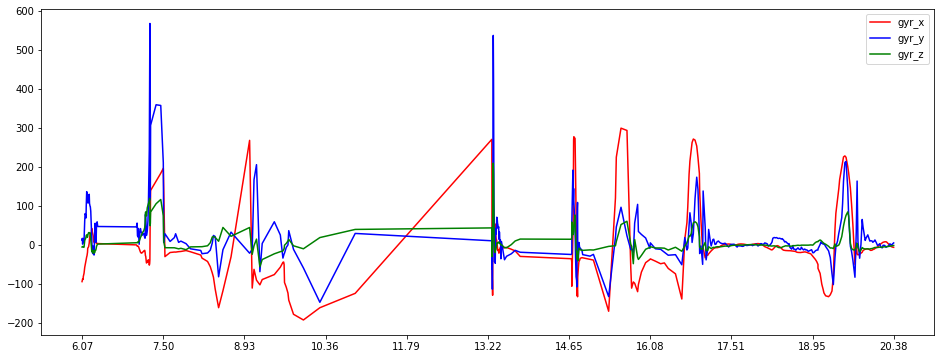

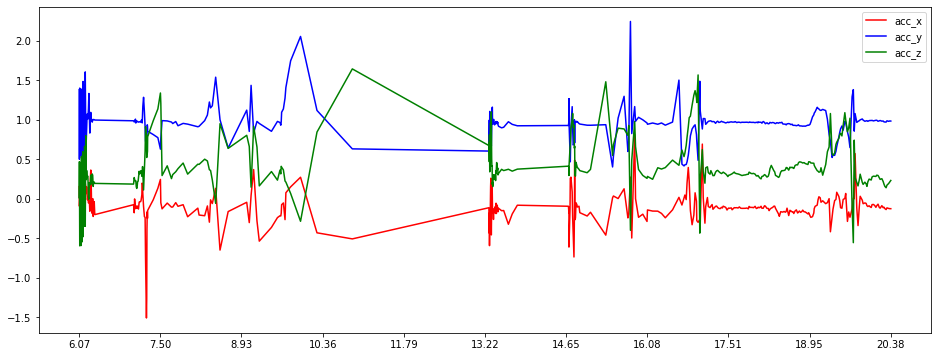

In [186]:
filepath = 'walk2-output-2021-05-03-07-36-25.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

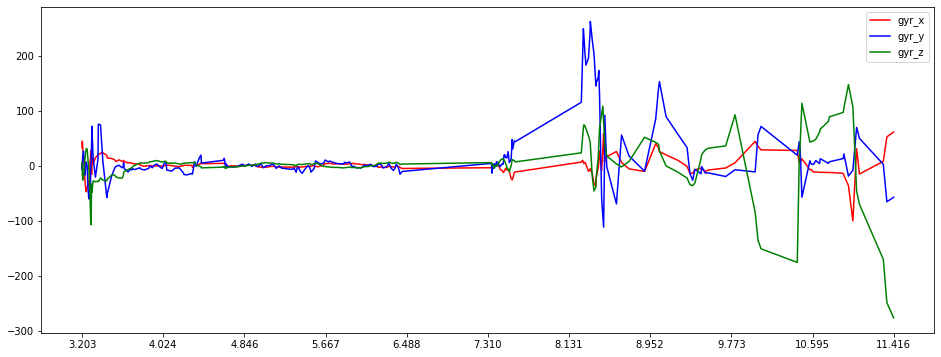

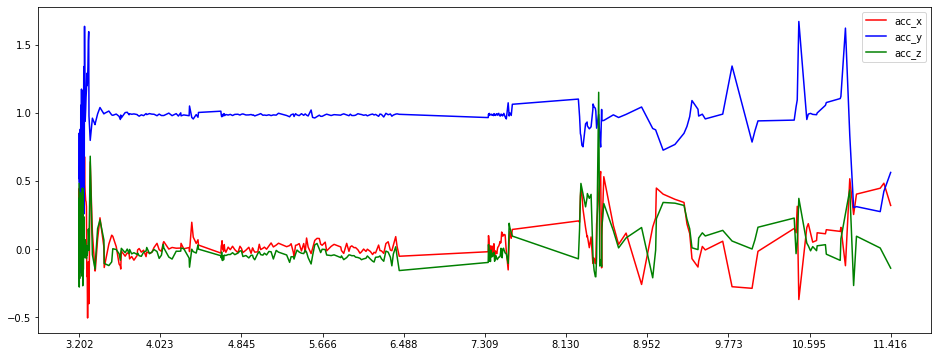

In [188]:
filepath = 'walk1-2-output-2021-05-03-07-31-41.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

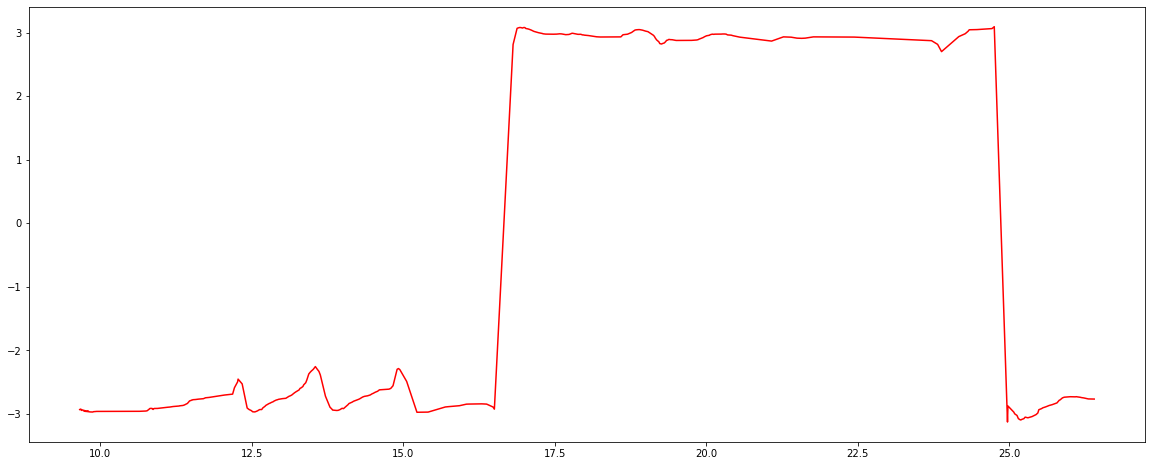

In [195]:
plt.figure(figsize=(20,8))
plt.plot(ori_time_1, ori_1[:,2],'r')
plt.show()

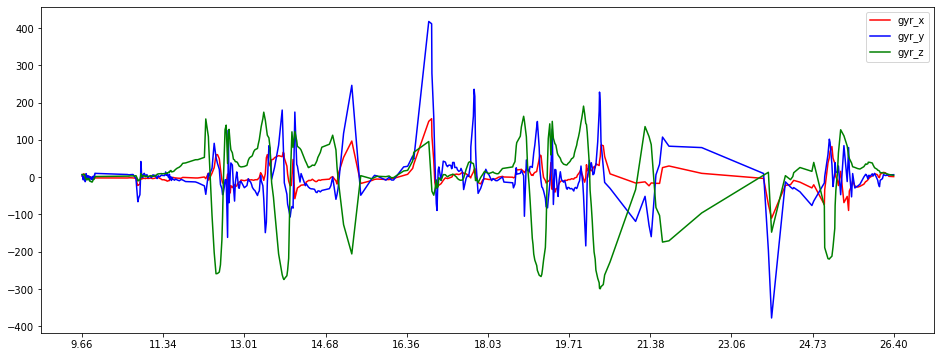

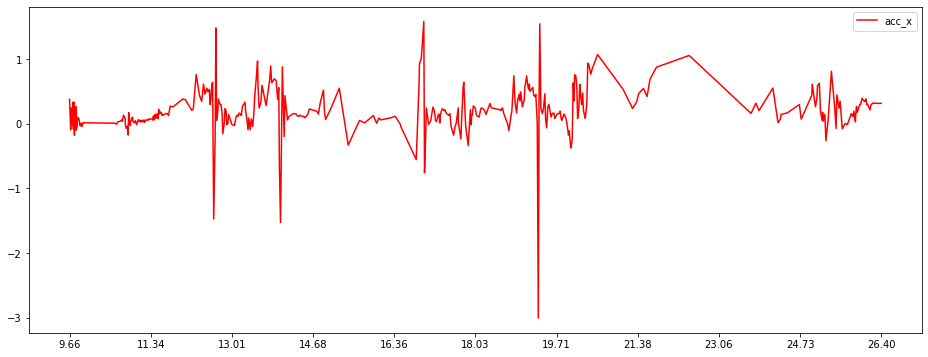

In [190]:
filepath = 'walk1-output-2021-05-03-08-03-14.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'x')

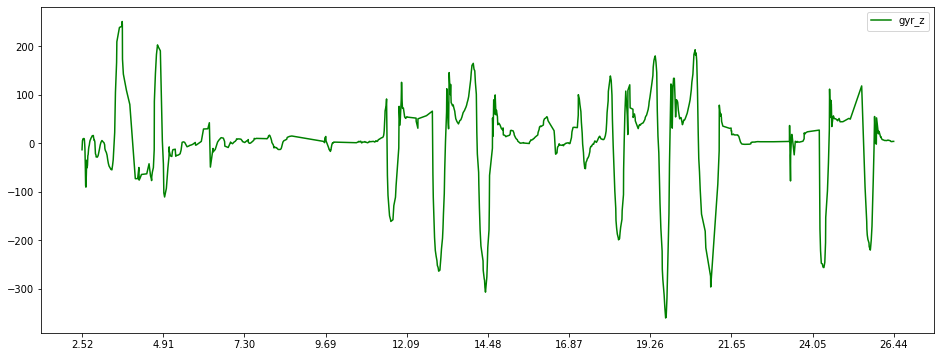

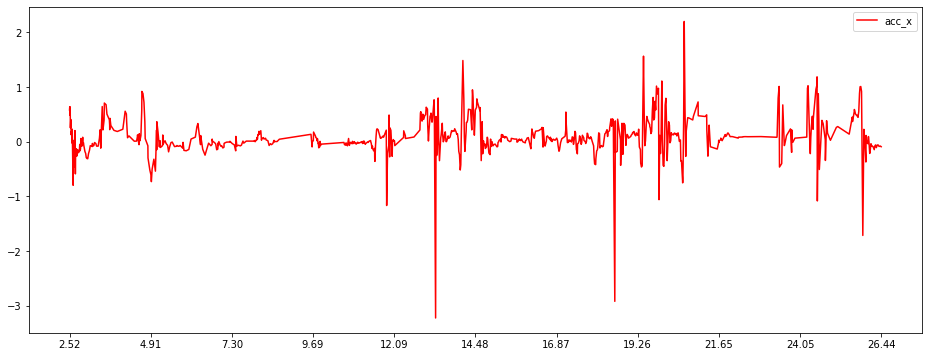

In [192]:
plot_data(gyr_time_2, gyr_2, 'gyr', 'z')
plot_data(acc_time_2, acc_2, 'acc', 'x')

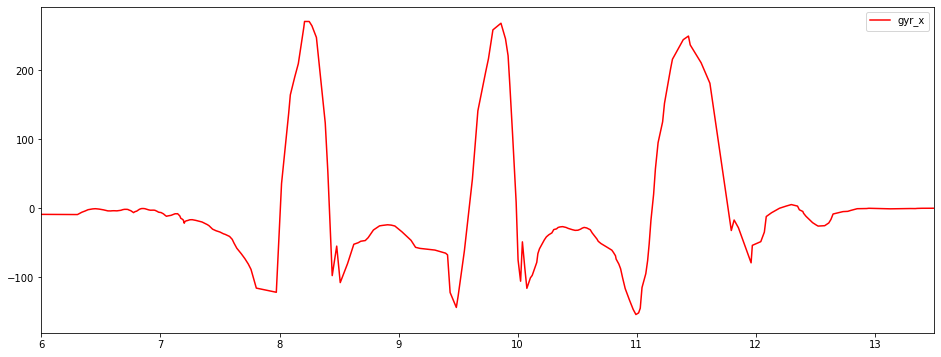

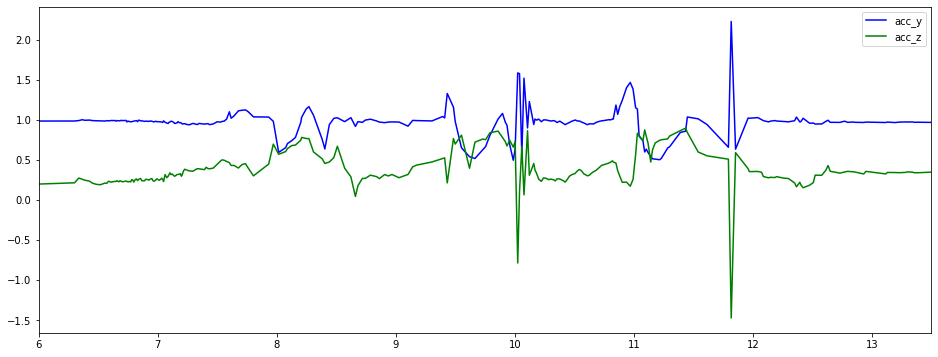

In [257]:
filepath = 'walk2-output-2021-05-03-20-25-58.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, gyr_1, 'gyr', [6, 13.5], 'x')
plot_data(acc_time_1, acc_1, 'acc', [6, 13.5], 'yz')

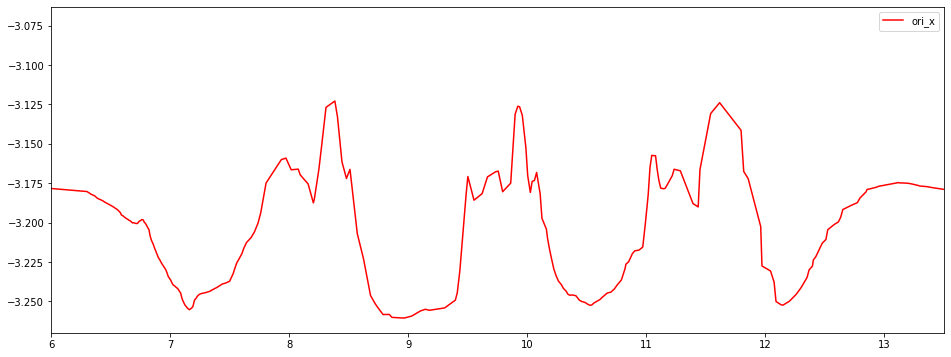

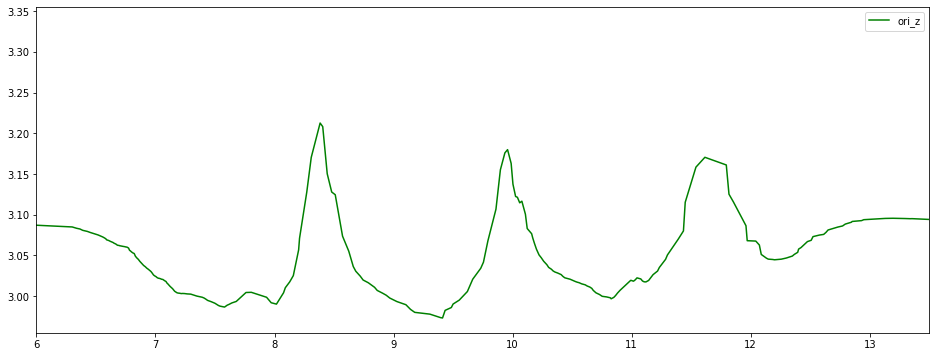

In [258]:
ori_1[:,0] = [x if x > 0 else x+2*math.pi for x in ori_1[:,0]]
ori_1[:,2] = [x if x > 0 else x+2*math.pi for x in ori_1[:,2]]
plot_data(ori_time_1, -ori_1, 'ori', [6, 13.5], 'x')
plot_data(ori_time_1, ori_1, 'ori', [6, 13.5], 'z')

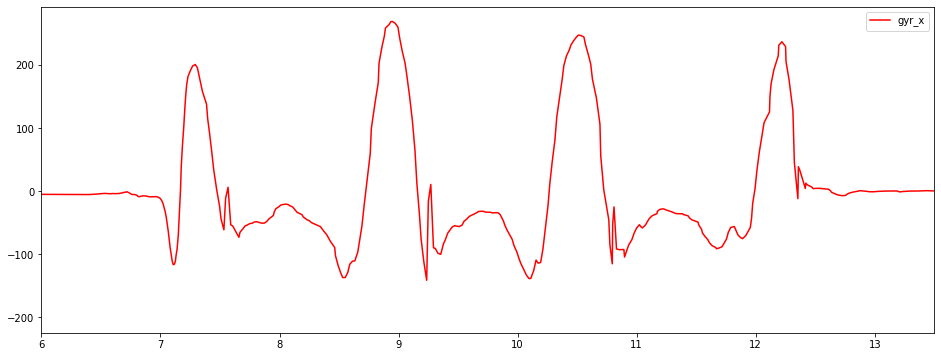

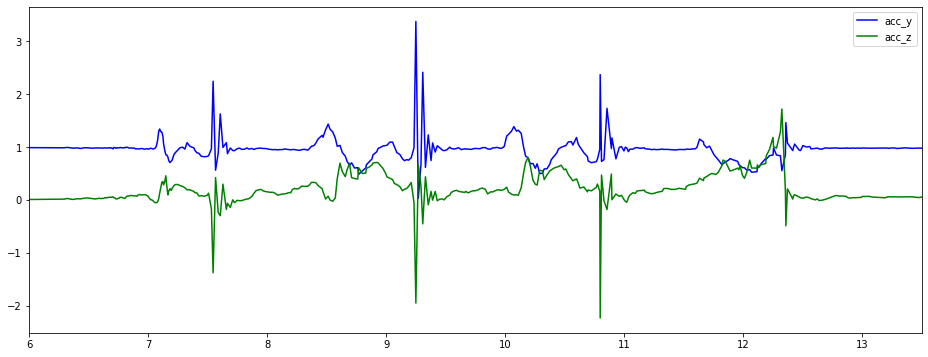

In [259]:
plot_data(gyr_time_2, gyr_2, 'gyr', [6, 13.5], 'x')
plot_data(acc_time_2, acc_2, 'acc', [6, 13.5], 'yz')

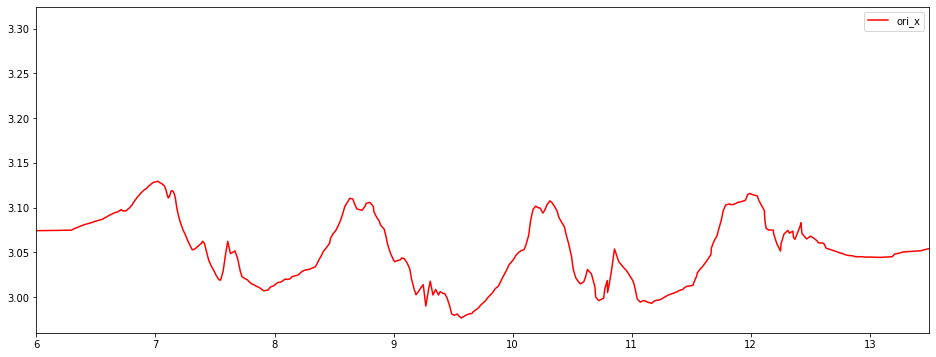

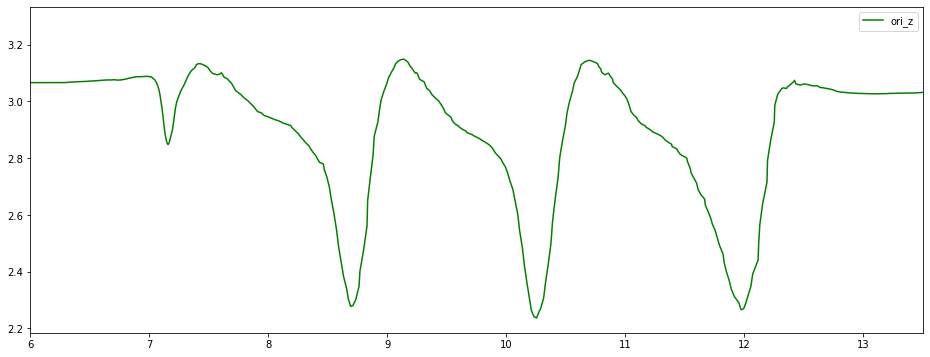

In [256]:
# ori_2[:,0] = [x if x > 0 else x+2*math.pi for x in ori_2[:,0]]
# ori_2[:,2] = [x if x > 0 else x+2*math.pi for x in ori_2[:,2]]
plot_data(ori_time_2, ori_2, 'ori', [6, 13.5], 'x')
plot_data(ori_time_2, ori_2, 'ori', [6, 13.5], 'z')

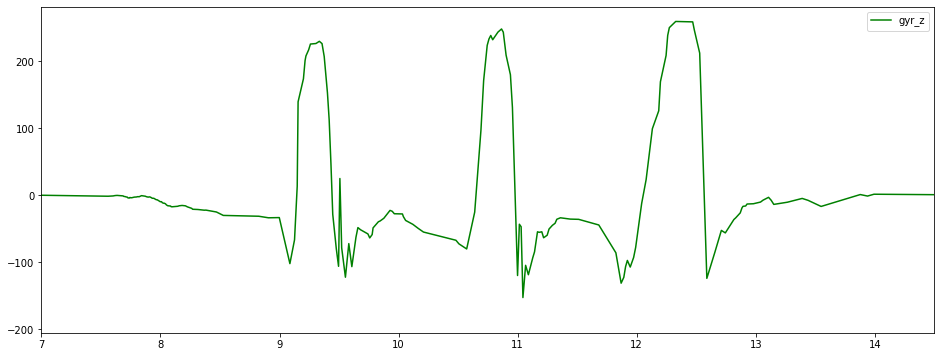

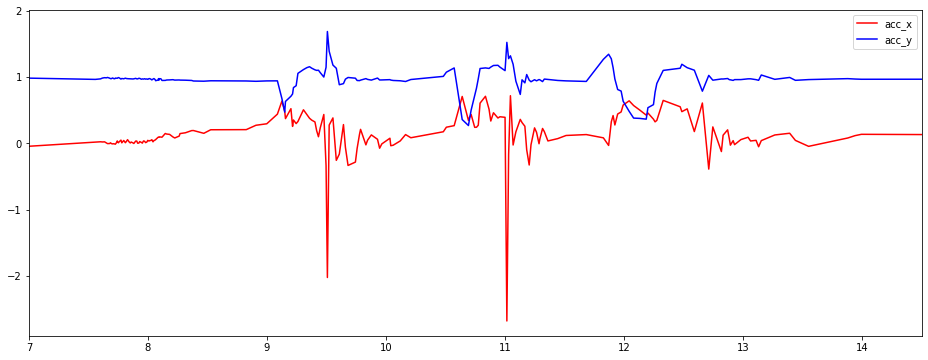

In [260]:
filepath = 'walk1-output-2021-05-03-20-23-32.txt'

data1, data2 = init_data()
read_file(filepath, data1, data2)

# get data for myo 1
ori_time_1 = np.array(data1['ori']['time'])
ori_1 = np.array(data1['ori']['ori'])

acc_time_1 = np.array(data1['acc']['time'])
acc_1 = np.array(data1['acc']['acc'])/2048

gyr_time_1 = np.array(data1['gyr']['time'])
gyr_1 = np.array(data1['gyr']['gyr'])/16.4

# get data for myo 2
ori_time_2 = np.array(data2['ori']['time'])
ori_2 = np.array(data2['ori']['ori'])

acc_time_2 = np.array(data2['acc']['time'])
acc_2 = np.array(data2['acc']['acc'])/2048

gyr_time_2 = np.array(data2['gyr']['time'])
gyr_2 = np.array(data2['gyr']['gyr'])/16.4

plot_data(gyr_time_1, -gyr_1, 'gyr', [7, 14.5], 'z')
plot_data(acc_time_1, acc_1, 'acc', [7, 14.5], 'xy')

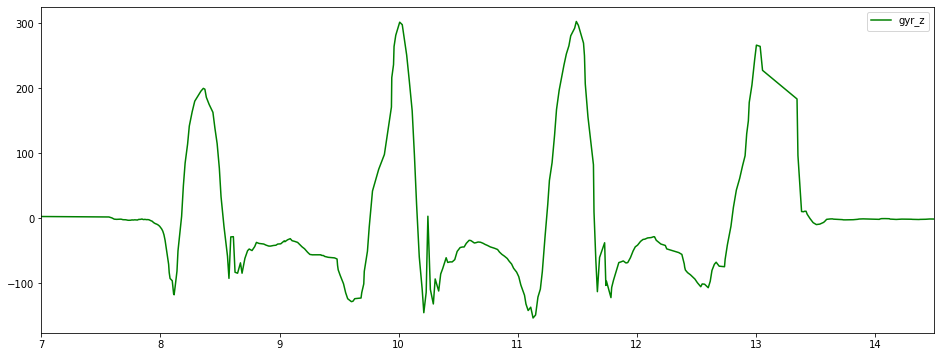

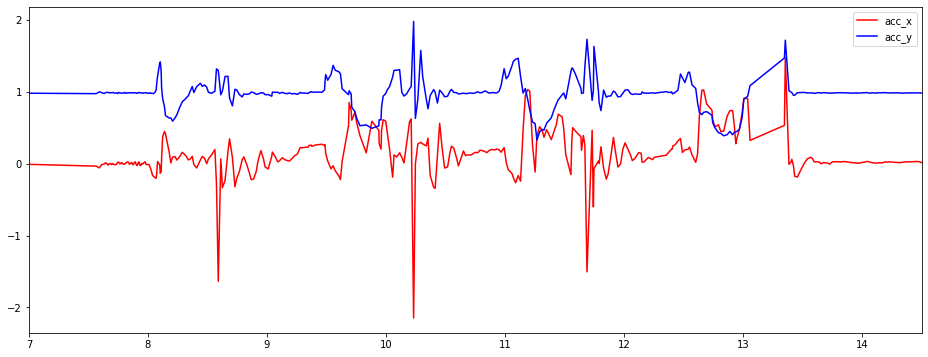

In [261]:
plot_data(gyr_time_2, -gyr_2, 'gyr', [7, 14.5], 'z')
plot_data(acc_time_2, acc_2, 'acc', [7, 14.5], 'xy')

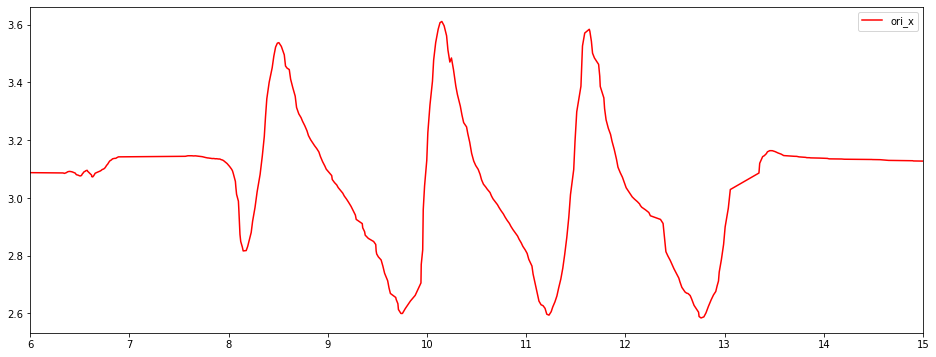

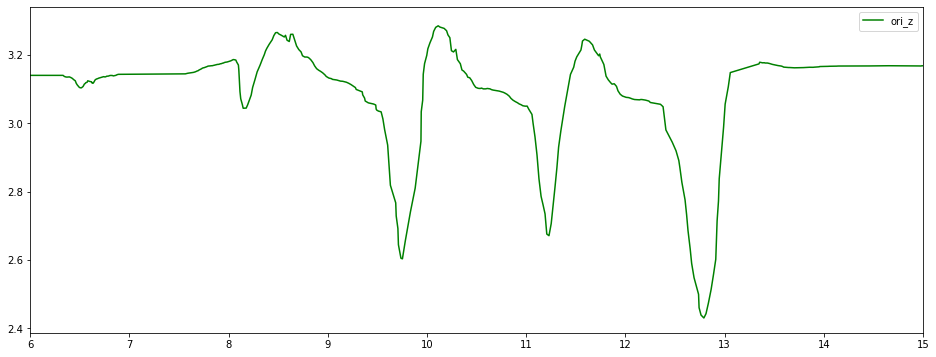

In [266]:
# ori_2[:,0] = [x if x > 0 else x+2*math.pi for x in ori_2[:,0]]
# ori_2[:,2] = [x if x > 0 else x+2*math.pi for x in ori_2[:,2]]
plot_data(ori_time_2, ori_2, 'ori', [6, 15], 'x')
plot_data(ori_time_2, ori_2, 'ori', [6, 15], 'z')

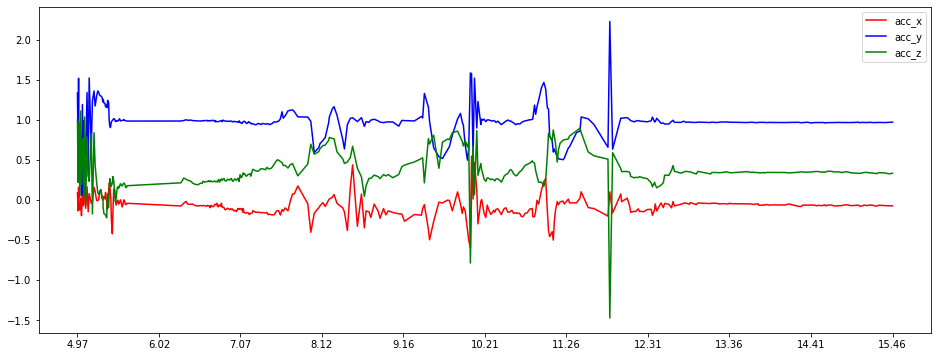

In [209]:
plot_data(acc_time_1, acc_1, 'acc', 'x')

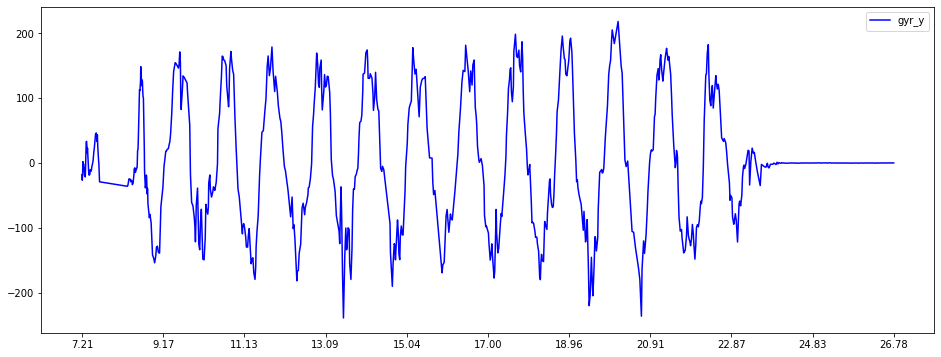

217.7439024390244


In [9]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'y')
print(max(gyr_1[:,1]))

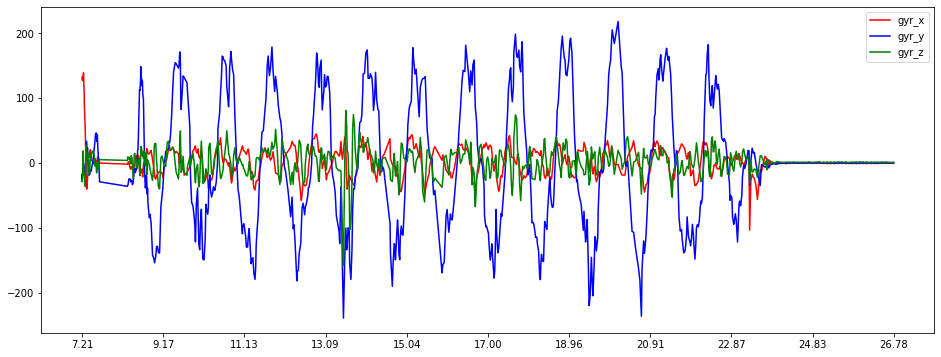

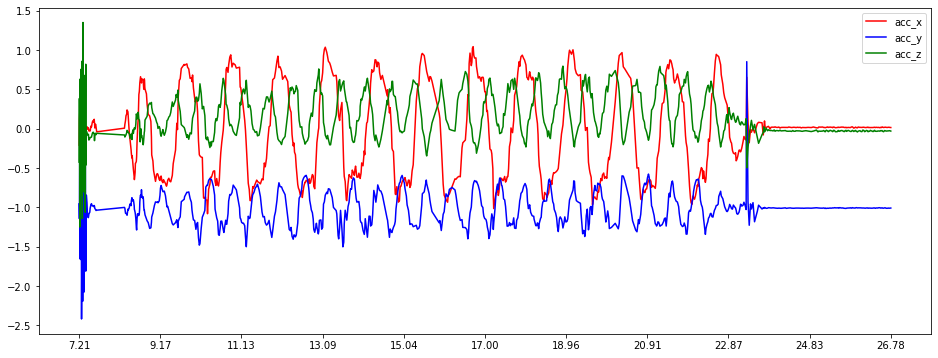

In [12]:
plot_data(gyr_time_1, gyr_1, 'gyr', 'xyz')
plot_data(acc_time_1, acc_1, 'acc', 'xyz')

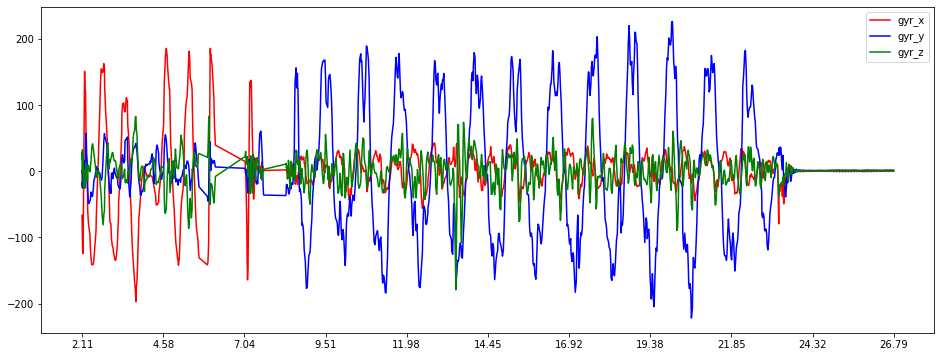

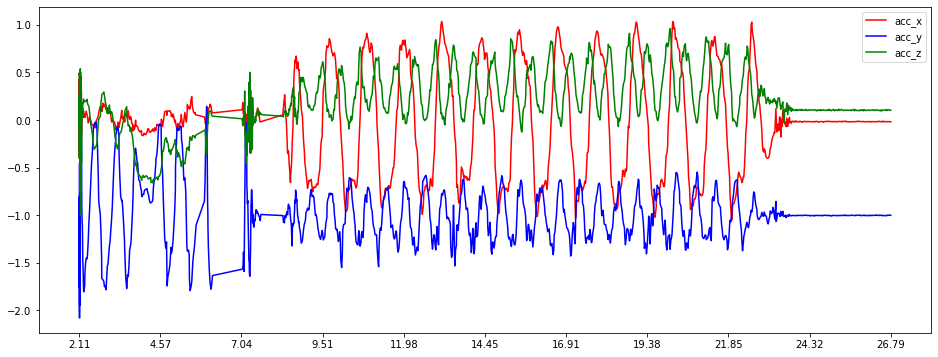

In [13]:
plot_data(gyr_time_2, gyr_2, 'gyr', 'xyz')
plot_data(acc_time_2, acc_2, 'acc', 'xyz')